In [144]:
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
sns.set_theme(style="darkgrid")
nltk.download('punkt')
nltk.download('wordnet')
import warnings
warnings.filterwarnings("ignore")
#To display full output.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import plotly.graph_objects as go

#pip install tensorflow
import string
import random


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [145]:
train= pd.read_excel("Data_Train.xlsx")
test = pd.read_excel("Data_Test.xlsx") 
print("Train shape {} and Test shape is {}".format(train.shape,test.shape))

Train shape (6237, 9) and Test shape is (1560, 8)


In [167]:
df=pd.concat([train,test])
print("Whole data shape {}".format(df.shape))
df.isnull().sum()

Whole data shape (7797, 9)


Title           0   
Author          0   
Edition         0   
Reviews         0   
Ratings         0   
Synopsis        0   
Genre           0   
BookCategory    0   
Price           1560
dtype: int64

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7797 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         7797 non-null   object 
 1   Author        7797 non-null   object 
 2   Edition       7797 non-null   object 
 3   Reviews       7797 non-null   object 
 4   Ratings       7797 non-null   object 
 5   Synopsis      7797 non-null   object 
 6   Genre         7797 non-null   object 
 7   BookCategory  7797 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 609.1+ KB


In [148]:
df.head(1).T

,0
Title,The Prisoner's Gold (The Hunters 3)
Author,Chris Kuzneski
Edition,"Paperback,– 10 Mar 2016"
Reviews,4.0 out of 5 stars
Ratings,8 customer reviews
Synopsis,"THE HUNTERS return in their third brilliant novel from the Sunday Times Top Ten bestselling author Chris Kuzneski, whose writing James Patterson says has 'raw power'. The team are hunting Marco Polo's hidden treasure, but who is on their tail?\nTHE HUNTERS\nIf you seek, they will find...\n\nThe travels of Marco Polo are known throughout the world.\nBut what if his story isn't complete?\nWhat if his greatest adventure has yet to be discovered?\nGuided by a journal believed to have been dictated by Polo himself,\nthe Hunters set out in search of his final legacy:\nthe mythical treasure gathered during Polo's lifetime of exploration.\nBut as every ancient clue brings them closer to the truth,\neach new step puts them in increasing danger...\nExplosive action. Killer characters. Classic Kuzneski."
Genre,Action & Adventure (Books)
BookCategory,Action & Adventure
Price,220


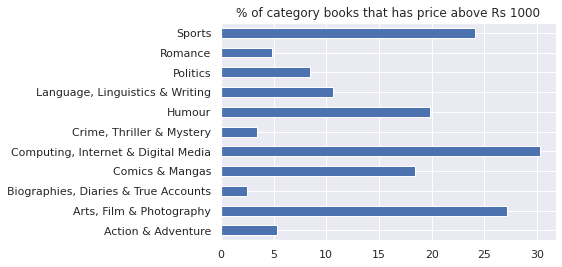

In [168]:
(df["BookCategory"][df["Price"]>800].value_counts()/df["BookCategory"].value_counts()*100).plot(kind='barh')
plt.title("% of category books that has price above Rs 1000")
plt.show()

**Feature Engineering**

In [169]:
df["Ratings"]=df.Ratings.str.extract('(\d+)')

df['Reviews']=df['Reviews'].astype(str).str[0:3]

for col in ['Reviews', 'Ratings']:
    df[col] =df[col].astype('float64')
df["High_P"]=df["BookCategory"].apply(lambda x:1 if x in ["Sports","Computing, Internet & Digital Media",
                    "Comics & Manga","Arts, Film & Adventure","Humour"] else 0)
df["Reviews"][(df.Reviews<3) & (df.Price>1200)]=3.8
df["Type"]=df["Edition"].astype(str).apply(lambda x:x.split(",")[0])
df["Date"]=df["Edition"].astype(str).apply(lambda x:x.split(",")[1])
special_char_list = ["–"]
df["Date"]=df.Date.astype(str).apply(lambda x:"".join([k for k in x if k not in special_char_list]))
df["Year"]=df["Edition"].astype(str).apply(lambda x:x[-4:])
df['Year']=df['Year'].astype(str).apply(lambda x:x if x.isdigit()==True else "DN")
a=re.findall(r"([0-9]{4})", str(df["Synopsis"][df["Year"]=="DN"]))
b=[]
for i in a:
  if 1800<int(i)<2021:
    b.append(i)
  else:
    b.append("DN")
b.append("DN")
df.loc[df["Year"].eq("DN"), "Year"]= b
yr=["2017","2016","2018","2015","2014","2013","2019","2012","2010"]
df["Year"]=df["Year"].astype(str).apply(lambda x:random.choice(yr) if x in ["DN"] else x)
df["Year"]=df["Year"].astype(int)
del a, b
def tokenize(text):
    split=re.split("\W+",text) 
    return split
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text
def lem(review):
  wl = WordNetLemmatizer()  #Lemmatizing (Loving/Loved->Love)
  review = [wl.lemmatize(word) for word in review]
  return review
df["sun"]=df["Synopsis"].apply(lambda x:x.lower())
df["sun"]=df["sun"].apply(lambda x:x.translate(str.maketrans('', '', string.punctuation)))
df["sun"]=df["sun"].apply(lambda x:x.replace("\n", " "))
df['sun']=df['sun'].apply(lambda x: tokenize(x))
df['sun'] = df['sun'].apply(lambda x: remove_stopwords(x))
df['sun'] = df['sun'].apply(lambda x: lem(x))
df['sun']=[" ".join(review) for review in df['sun'].values]
df["Nice"]=df["sun"].str.contains("set|winner|python|exam|learning|programming|student|practical|revised|album|edition|prize|premium|marvel|dc|disney|series|thrones|volume|guide|learn|god|lord",
                                  regex=True)

df["Nice"].replace({True: 1, False: 0}, inplace=True)
a=df.Price.groupby(by=df["Author"]).sum()/df["Author"].value_counts()
b=pd.DataFrame(a[a>800])
b["Name"]=a[a>800].index
a=df["Author"].value_counts()
c=pd.DataFrame(a[a>=2])
c["Name"]=a[a>=2].index
a=np.intersect1d(c["Name"], np.intersect1d(c["Name"], b["Name"]))
df["writer"]=df["Author"].apply(lambda x:1 if x in a else 0)
del a,c,b
df["Imported"]=df.Date.astype(str).apply(lambda x:1 if x in ["Imported"] else 0)
df["Illus"]=df.Date.astype(str).apply(lambda x:1 if x in ["Illustration"] else 0)
df["Una"]=df.Date.astype(str).apply(lambda x:1 if x in ["Unabridged"] else 0)
df["Abr"]=df.Date.astype(str).apply(lambda x:1 if x in ["Abridged"] else 0)
df["SE"]=df.Date.astype(str).apply(lambda x:1 if x in ["Special Edition"] else 0)
df["StudentE"]=df.Date.astype(str).apply(lambda x:1 if x in ["Student Edition"] else 0)
df["IE"]=df.Date.astype(str).apply(lambda x:1 if x in ["International Edition"] else 0)
df["BS"]=df.Date.astype(str).apply(lambda x:1 if x in ["Box set"] else 0)

**Visualizations**

In [151]:
def Category(Hi):
  fig, ax = plt.subplots(figsize=(5,5))
  for i, v in enumerate(df[Hi].value_counts()):
    ax.text(v + 3, i + .25, str(v), color='blue')
  df[Hi].value_counts().plot(kind="barh",ax=ax)
  plt.title("Count of {} column".format(Hi))
  fig, ax = plt.subplots(figsize=(5,5))
  for i, v in enumerate(pd.DataFrame(df.Price.groupby(by=df[Hi]).sum()/df[Hi].value_counts())):
    ax.text(v + 3, i + .25, str(v), color='blue')
  pd.DataFrame(df.Price.groupby(by=df[Hi]).sum()/df[Hi].value_counts()).plot(kind="barh",ax=ax)
  plt.title("Average Price of each category of {} column".format(Hi))
  fig, ax = plt.subplots(figsize=(5,5))
  df.Price.groupby(by=df[Hi]).sum().plot(kind="barh",ax=ax)
  plt.title("Total sum of price of each {} column category".format(Hi))
  return plt.show()
def numerical(Hi):
  fig, ax = plt.subplots(figsize=(17,5))
  sns.boxplot(df[Hi])
  plt.title("Boxplot of {} column".format(Hi))
  return plt.show() 


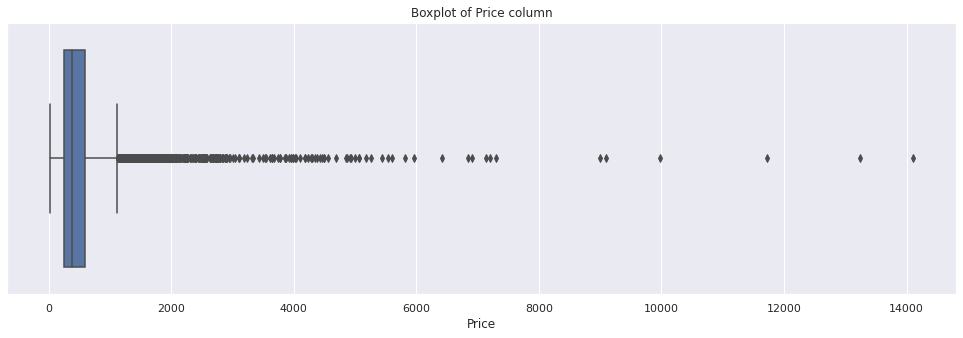

In [152]:
numerical("Price")

In [170]:
df["Price"][df["Price"]>8000]=6000

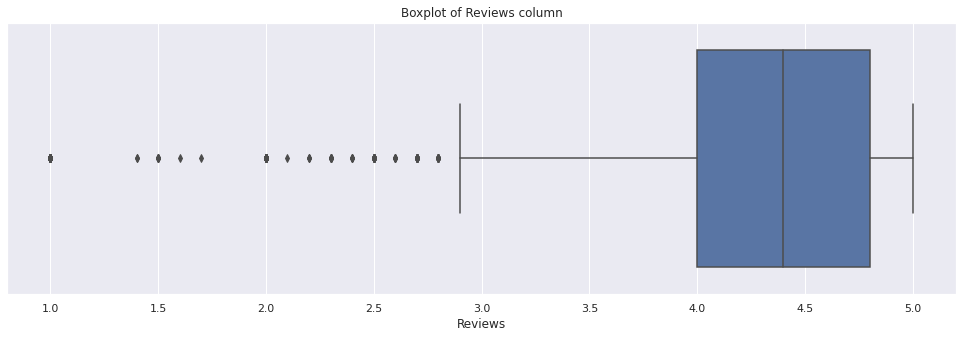

In [154]:
numerical("Reviews")

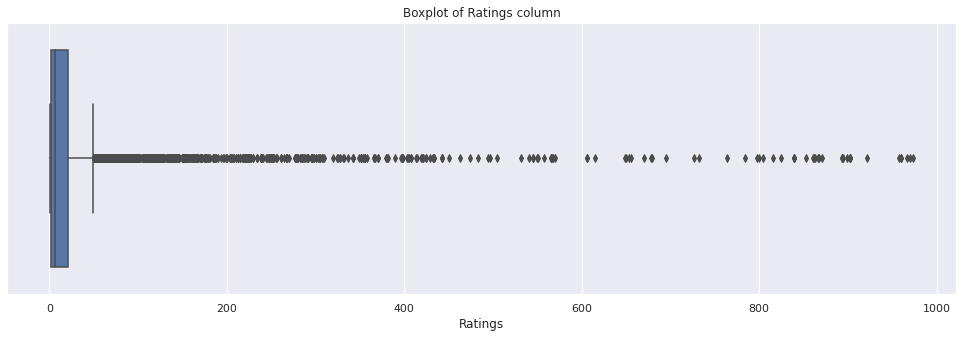

In [155]:
numerical("Ratings")

In [171]:
df["A1"]=np.nan
df["A1"][(df['Reviews']<4.5) & (df['Ratings']>100)]=1
df['A1'].fillna(0,inplace=True)

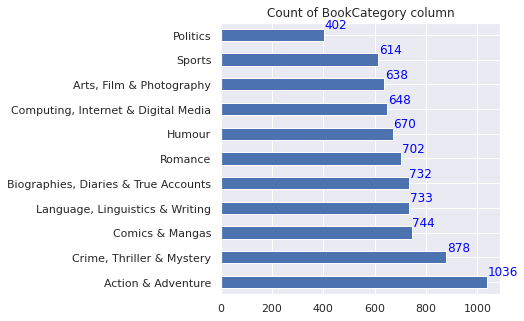

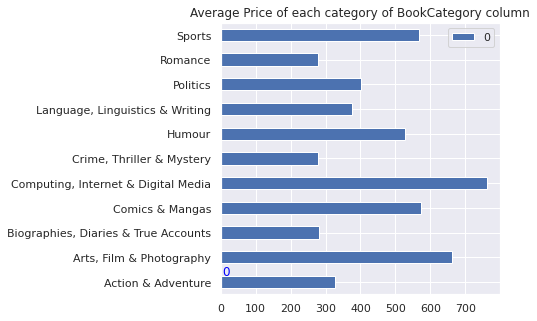

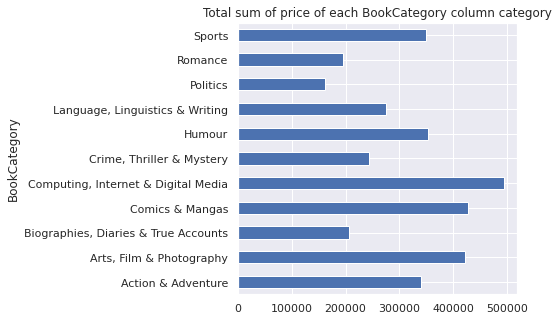

In [157]:

Category("BookCategory")


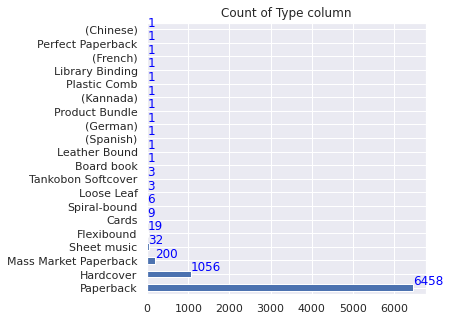

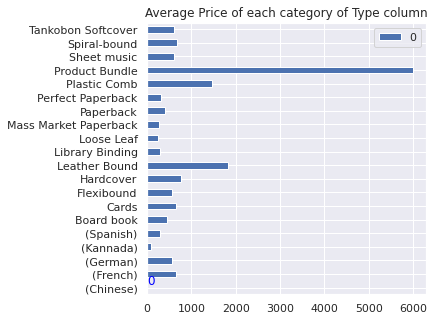

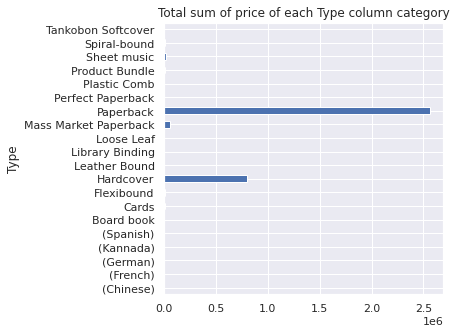

In [158]:
Category("Type")


In [172]:
df["GoodBuild"]=df["Type"].astype(str).apply(lambda x:1 if x in ["Paperback","Hardcover"] else 0)


df=df.drop(columns=["Title","Author","Edition","Genre","BookCategory","Type","Date","Synopsis","sun"], axis=1)

df["Year"]=np.log(df["Year"])

In [173]:
tr=df[df["Price"].notnull()]
ts=df[df["Price"].isnull()]
del ts['Price']

In [174]:
x=tr.loc[:, tr.columns != 'Price']
y=tr["Price"]

In [175]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [178]:
param_grid = { 
    'n_estimators': [50,100,200,600,800,1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [3,4,6,8],
    'min_samples_split':[4,5,6,8]
}

#MSE 531419.6861521179
from sklearn.ensemble import RandomForestRegressor
xg = RandomForestRegressor()
from sklearn.model_selection import GridSearchCV
random_cv = GridSearchCV(estimator=xg,
            param_grid=param_grid,
            cv=4,
            n_jobs=-1,
            verbose=True)
best=random_cv.fit(x_train,y_train)
best.best_params_

Fitting 4 folds for each of 192 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed:  9.9min finished


{'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_split': 6,
 'n_estimators': 200}

In [179]:
xg=RandomForestRegressor(**best.best_params_)
#491171.53121390176
xg.fit(x_train,y_train)
pred=xg.predict(x_test)

In [180]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,pred))

MSE 324238.515822434


In [166]:
xg.fit(x,y)
a=xg.predict(ts)
a=a.astype(int)
a=pd.DataFrame({'Price':a})
a.to_excel("WTF.xlsx", index=False)